In [1]:
from dataset import MyDataset
import modules
from vidobj import VideoObj
import answerer

2023-12-31 08:18:18.911803: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-31 08:18:18.911843: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-31 08:18:18.913505: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-31 08:18:20.192267: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
dataset = MyDataset(data_path="/shared/shang/datasets/nextqa/videos/",
                    query_file="/shared/shang/datasets/nextqa/metadata/queries_2k.csv",
                    max_samples=100)

In [3]:
item = dataset[0]
video = VideoObj(item["video"], item["query"], item["possible_answers"])

In [4]:
siglip = modules.SiglipModel(gpu_number=6, siglip_model_type="ViT-B-16-SigLIP")
llava = modules.LLAVA(gpu_number=5)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [6]:
llm = modules.GPTModel()

In [7]:
ans = answerer.Answerer(llava, llava, siglip, llm, video)

In [12]:
item

{'index': 0,
 'sample_id': 4377,
 'possible_answers': "['frown', 'curious', 'look at lights', 'dances', 'try to turn around']",
 'query_type': '',
 'query': 'what does the baby do after he lights up the toy?',
 'answer': 2,
 'video_name': '3471421544.mp4',
 'video': [<PIL.Image.Image image mode=RGB size=640x480>,
  <PIL.Image.Image image mode=RGB size=640x480>,
  <PIL.Image.Image image mode=RGB size=640x480>,
  <PIL.Image.Image image mode=RGB size=640x480>,
  <PIL.Image.Image image mode=RGB size=640x480>,
  <PIL.Image.Image image mode=RGB size=640x480>,
  <PIL.Image.Image image mode=RGB size=640x480>,
  <PIL.Image.Image image mode=RGB size=640x480>,
  <PIL.Image.Image image mode=RGB size=640x480>,
  <PIL.Image.Image image mode=RGB size=640x480>,
  <PIL.Image.Image image mode=RGB size=640x480>,
  <PIL.Image.Image image mode=RGB size=640x480>,
  <PIL.Image.Image image mode=RGB size=640x480>,
  <PIL.Image.Image image mode=RGB size=640x480>,
  <PIL.Image.Image image mode=RGB size=640x480>,

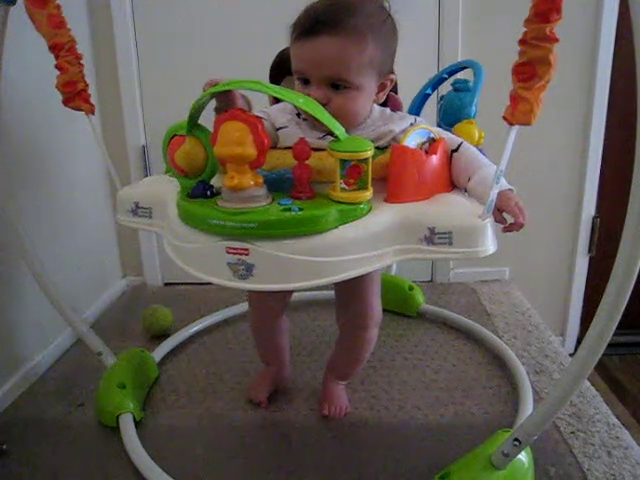

In [41]:
item['video'][770]

In [26]:
resp = ans.extractor.forward(item['video'][700], questions=["We are trying to answer the question 'What does the baby do after lighting up the toy?' Provide a detailed description of the image that helps us the most with answering this."], caption=False)

In [28]:
resp


('Time 0/59.56666666666667',
 ["Q - We are trying to answer the question 'What does the baby do after lighting up the toy?' Provide a detailed description of the image that helps us the most with answering this. A - In the image, a baby is sitting on a play mat and is playing with a toy that has a green and yellow color scheme. The baby is holding the toy in their hands, and it appears to be a toy with a lot of buttons. The baby is also holding a ball in their hands, which is placed next to the toy. The scene takes place in a room with a door visible in the background. The baby seems to be enjoying their playtime, exploring the toy and the ball."])

In [42]:
resp = ans.extractor.forward(item['video'][770], questions=["Is the toy being lit up? We are trying to answer the question `What does the baby do after looking at the lights` from the possible answers ['frown', 'curious', 'eats', 'dances', 'try to turn around']"], caption=False)

In [43]:
resp

('Time 0/59.56666666666667',
 ["Q - Is the toy being lit up? We are trying to answer the question `What does the baby do after looking at the lights` from the possible answers ['frown', 'curious', 'eats', 'dances', 'try to turn around'] A - The toy is not being lit up. The baby is looking at the lights, but the toy itself is not lit up."])

In [20]:
resp

('Time 0/59.56666666666667',
 ['Q - Is the toy being lit up? A - Yes, the toy is being lit up, which adds to the visual appeal and excitement for the baby.'])

In [34]:
resp = ans.extractor.forward(item['video'][730], questions=["What is the baby doing? We are trying to answer the question `What does the baby do after looking at the lights` from the possible answers ['frown', 'curious', 'looking at lights', 'dances', 'try to turn around']"], caption=False)

In [35]:
resp

('Time 0/59.56666666666667',
 ["Q - What is the baby doing? We are trying to answer the question `What does the baby do after looking at the lights` from the possible answers ['frown', 'curious', 'looking at lights', 'dances', 'try to turn around'] A - The baby is looking at the lights on the toy."])

In [25]:
resp

('Time 0/59.56666666666667',
 ["Q - What is the baby doing? Choose the best choice from the following: ['frown', 'curious', 'look at lights', 'dances', 'try to turn around'] A - The baby is curiously looking at the lights on the baby toy."])

In [23]:
resp

('Time 0/59.56666666666667',
 ['Q - What is the baby doing? A - The baby is standing on a step and playing with a toy, specifically a baby walker or a toy carousel.'])

In [16]:
siglip_prompt = ans.siglip_prompt(ans.video.question)
keyframe_query = ans.llm.forward(siglip_prompt)

In [25]:
siglip.forward(ans.video.images, queries="baby action after lighting up toy")

IndexError: index 1 is out of bounds for dimension 0 with size 1

'baby action after lighting up toy'